# Pandas

In [77]:
import pandas as pd

In [80]:
data = pd.read_csv('./HW_ML_01_02_BlackFriday.csv')

In [81]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**Задание 1** (0.5 балла за каждый пункт)

1. Сколько всего уникальных покупателей?
2. Сколько женщин из города категории A старше 36 лет?
3. Сколько покупателей от 26 до 35, потративших (столбец Purchase) больше 10000 у.е. и проживающих в городе категории В?
4. Какая доля от всех покупок приходится на город категории А?


In [83]:
# 1.1
print(len(pd.unique(data['User_ID'])))

5891


In [84]:
# 1.2
print(len(pd.unique(data[(data['Gender']=='F') & 
                    (data['City_Category']=='A') & 
                    (data['Age']!='0-17') & 
                    (data['Age']!='18-25') & 
                    (data['Age']!='26-35')]['User_ID'])))

102


In [85]:
# 1.3
print(len(pd.unique(data[(data['Purchase']>10000) & 
                    (data['City_Category']=='B') & 
                    (data['Age']=='26-35')]['User_ID'])))

649


In [86]:
# 1.4
print(len(data[data['City_Category']=='A'])/len(data))

0.26854861580750017


~ 26,85%

**Задание 2** (1 балл за каждый пункт)

1. Какая средняя сумма всех покупок на одного покупателя?
2. Какое среднее число покупок делает покупатель каждого пола?
2. Какая возрастная категория самая прибыльная?

In [87]:
# 2.1
print(data['Purchase'].sum() / len(pd.unique(data['User_ID'])))

865016.5917501273


In [ ]:
# 2.2
print('Cреднее число покупок сделанных мужчинами',
      len(data[data['Gender']=='M']) / len(pd.unique(data[data['Gender']=='M']['User_ID'])))
print('Cреднее число покупок сделанных женщинами',
      len(data[data['Gender']=='F']) / len(pd.unique(data[data['Gender']=='F']['User_ID'])))

Cреднее число покупок сделанных мужчинами 98.0494674556213
Cреднее число покупок сделанных женщинами 81.51800720288115


In [ ]:
# 2.3
data2 = data.groupby('Age').agg({'Purchase':'sum'}).reset_index()
data2[data2['Purchase']==data2['Purchase'].max()]

,Age,Purchase
2,26-35,2031770578


Возрастная категория 26-35 самая прибыльная

**Задание 2** (1 балл)

Создайте категориальную фичу Purchase_Сat с помощью колонки Purchase:

1. Purchase_cat = '<5000' , если Purchase < 5000

2. Purchase_cat = '5000 - 8000' , если 5000 <= Purchase < 8000

2. Purchase_cat = '>=8000' , если 8000 <= Purchase

In [88]:
data['Purchase_cat'] = data['Purchase'].map(lambda x: '<5000' if x < 5000 else ('>=8000' if x >= 8000 else '5000 - 8000'))
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_cat
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,>=8000
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,>=8000
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,<5000
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,<5000
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,5000 - 8000


**Задание 3** (1 балл)

Создайте таблицу shipping:

| Purchase_Cat | Shipping_Cost_Raw |   |   |   |
|--------------|-------------------|---|---|---|
| <5000        | 100               |   |   |   |
| 5000 - 8000  | 50                |   |   |   |
| >=8000       | 0                 |   |   |   |

In [89]:
shipping = pd.DataFrame({'Purchase_cat': ['<5000', '5000 - 8000', '>=8000'], 'Shipping_Cost_Raw': [100, 50, 0]})
shipping

,Purchase_cat,Shipping_Cost_Raw
0,<5000,100
1,5000 - 8000,50
2,>=8000,0


**Задание 4** (1 балл)


Добавьте в таблицу data колонку Shipping_Cost_Raw , используя таблицу shipping, созданную выше.

In [90]:
# merge

In [91]:
data = data.merge(shipping, how='inner')
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_cat,Shipping_Cost_Raw
550063,1006039,P00178542,F,46-50,0,B,4+,1,8,13.0,NaN,7796,5000 - 8000,50
550064,1006040,P00331042,M,26-35,6,B,2,0,5,8.0,NaN,7058,5000 - 8000,50
550065,1006040,P00101942,M,26-35,6,B,2,0,8,17.0,NaN,5948,5000 - 8000,50
550066,1006040,P00029842,M,26-35,6,B,2,0,8,NaN,NaN,7852,5000 - 8000,50
550067,1006040,P00106042,M,26-35,6,B,2,0,5,NaN,NaN,7159,5000 - 8000,50


**Задание 5** (2 балла)

Добавьте в таблицу data колонку Shipping_Cost, значения для которой определяются следующей формулой:

Shipping_cost = Shipping_Cost_raw * Cost_Coeff

Значения Cost_Coeff, определяются в соответствии с колонкой City_Category:

| City_Category | Cost_Coeff |   |   |   |
|---------------|------------|---|---|---|
| A             | 1          |   |   |   |
| B             | 1.2        |   |   |   |
| C             | 1.4        |   |   |   |

In [92]:
data['Shipping_cost'] = data['Shipping_Cost_Raw']*(data['City_Category'].map(lambda x: 1 if x == 'A' else (1.2 if x == 'B' else 1.4)))
data.tail(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_cat,Shipping_Cost_Raw,Shipping_cost
550061,1006037,P00121642,F,46-50,1,C,4+,0,5,14.0,NaN,6857,5000 - 8000,50,70.0
550062,1006039,P00110042,F,46-50,0,B,4+,1,5,14.0,NaN,7006,5000 - 8000,50,60.0
550063,1006039,P00178542,F,46-50,0,B,4+,1,8,13.0,NaN,7796,5000 - 8000,50,60.0
550064,1006040,P00331042,M,26-35,6,B,2,0,5,8.0,NaN,7058,5000 - 8000,50,60.0
550065,1006040,P00101942,M,26-35,6,B,2,0,8,17.0,NaN,5948,5000 - 8000,50,60.0
550066,1006040,P00029842,M,26-35,6,B,2,0,8,NaN,NaN,7852,5000 - 8000,50,60.0
550067,1006040,P00106042,M,26-35,6,B,2,0,5,NaN,NaN,7159,5000 - 8000,50,60.0


**Задание 6** (1 балл)

Чему равна сумма доставки (колонка Shipping_Cost) для всех покупателей?

In [93]:
# Если полагаем, что стоимость доставки на каждый товар отдельная
print(data['Shipping_cost'].sum())

# Если полагаем, что покупатель оплачивает доставку нескольких товаров один раз
data3 = data.groupby('User_ID').agg({'Shipping_cost':'mean'}).reset_index()
print(data3['Shipping_cost'].sum())

21768760.0
231823.64481193377


**Задание 7** (3 балла)

Из таблицы data создайте новую таблицу со статистикой по колонке Age. В этой таблице для каждого уникального значения Age должны быть:

* число покупателей (количество уникальных значений по полю User_ID), 
* средняя стоимость покупки (среднее по полю Purchase), 
* максимальная сумма покупки (максимальное значение поля Purchase), 
* минимальная сумма покупки (минимальное значение поля Purchase),
* средняя стоимость доставки (среднее значение поля Shipping_Cost).


In [94]:
# groupby 
# agg

In [95]:
data_stat = data.groupby('Age').agg({'User_ID':'nunique', 'Purchase':'mean'}).reset_index()
data_stat.rename(columns = {'User_ID':'Uniq_userID','Purchase':'Mean_pur'}, inplace = True)
data_stat2 = data.groupby('Age').agg({'Purchase':'max'}).reset_index()
data_stat2.rename(columns = {'Purchase':'Max_pur'}, inplace = True)
data_stat3 = data.groupby('Age').agg({'Purchase':'min', 'Shipping_cost':'mean'}).reset_index()
data_stat3.rename(columns = {'Purchase':'Min_pur'}, inplace = True)
data_stat = data_stat.merge(data_stat2, how='inner')
data_stat = data_stat.merge(data_stat3, how='inner')
data_stat

,Age,Uniq_userID,Mean_pur,Max_pur,Min_pur,Shipping_cost
0,0-17,218,8933.464640,23955,12,44.807310
1,18-25,1069,9169.663606,23958,12,40.581979
2,26-35,2053,9252.690633,23961,12,39.109601
3,36-45,1167,9331.350695,23960,12,39.163826
4,46-50,531,9208.625697,23960,12,40.459071
5,51-55,481,9534.808031,23960,12,37.839017
6,55+,372,9336.280459,23960,12,39.310361


In [96]:
data['Shipping_Cost'] = data['Shipping_Cost_Raw']*(data['City_Category'].map(lambda x: 1 if x == 'A' else (1.2 if x == 'B' else 1.4)))
data.tail(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_cat,Shipping_Cost_Raw,Shipping_cost,Shipping_Cost
550061,1006037,P00121642,F,46-50,1,C,4+,0,5,14.0,NaN,6857,5000 - 8000,50,70.0,70.0
550062,1006039,P00110042,F,46-50,0,B,4+,1,5,14.0,NaN,7006,5000 - 8000,50,60.0,60.0
550063,1006039,P00178542,F,46-50,0,B,4+,1,8,13.0,NaN,7796,5000 - 8000,50,60.0,60.0
550064,1006040,P00331042,M,26-35,6,B,2,0,5,8.0,NaN,7058,5000 - 8000,50,60.0,60.0
550065,1006040,P00101942,M,26-35,6,B,2,0,8,17.0,NaN,5948,5000 - 8000,50,60.0,60.0
550066,1006040,P00029842,M,26-35,6,B,2,0,8,NaN,NaN,7852,5000 - 8000,50,60.0,60.0
550067,1006040,P00106042,M,26-35,6,B,2,0,5,NaN,NaN,7159,5000 - 8000,50,60.0,60.0


**Задание 8** (2 балла)

1. Отсортируйте таблицу data по колонке Сity_Category(по убыванию), по колонке Shipping_Cost (по возрастанию при равенстве Сity_Category) и по колонке Purchase(по возрастанию при равенстве Shipping_Cost)

2. Перезапишите индексы в порядке убывания.

In [97]:
# 1
data_sorted = data.sort_values(by=['City_Category'], ascending=False)
data_sorted = data_sorted.sort_values(by=['City_Category', 'Shipping_cost','Purchase'], ascending=[False,True,True])

# 2
data_sorted.index = range(data_sorted.shape[0]-1,-1, -1)

data_sorted.reset_index()[:5]

,index,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_cat,Shipping_Cost_Raw,Shipping_cost,Shipping_Cost
0,550067,1002016,P00189842,F,55+,2,C,2,1,3,4.0,5.0,8000,>=8000,0,0.0,0.0
1,550066,1002565,P00002542,M,36-45,5,C,3,0,8,14.0,NaN,8000,>=8000,0,0.0,0.0
2,550065,1000891,P00315642,M,26-35,1,C,4+,0,8,13.0,NaN,8000,>=8000,0,0.0,0.0
3,550064,1000978,P00022742,M,18-25,0,C,1,0,8,NaN,NaN,8000,>=8000,0,0.0,0.0
4,550063,1004571,P00061142,M,36-45,7,C,2,1,8,16.0,NaN,8000,>=8000,0,0.0,0.0


In [98]:
assert (data_sorted.index == range(data_sorted.shape[0]-1,-1, -1)).all()
assert data.shape == data_sorted.shape

# Matplotlib

In [99]:
import matplotlib.pyplot as plt

**Задание 9** (1 балл)


Постройте гистограммы для колонок Purchase и Shipping_Cost таблицы data

Text(0.5, 1.0, 'Shipping cost')

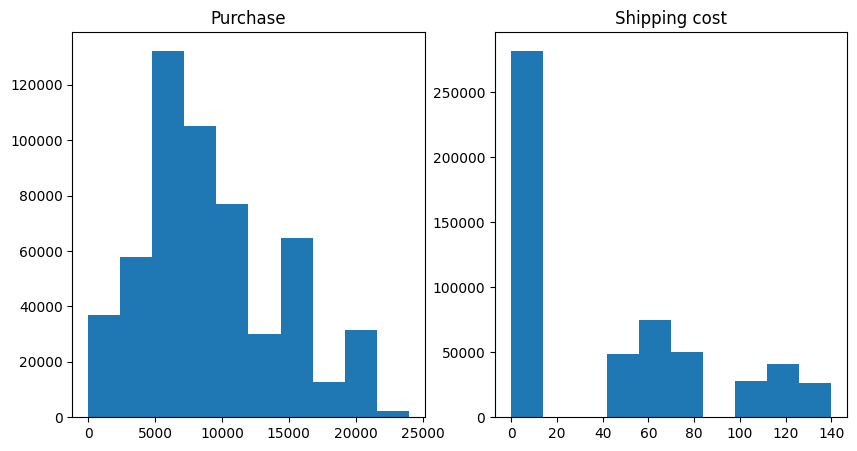

In [100]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].hist(data['Purchase'])
axs[0].set_title('Purchase')
axs[1].hist(data['Shipping_Cost'])
axs[1].set_title('Shipping cost')

**Задание 10** (2 балла)

Постройте круговую диаграмму (pie) распределения поля City_category. 

Добавьте:
* подписи долей (labels=...), 
* процентную долю каждого класса (autopct='%1.1f%%'), 
* вырез в центре (wedgeprops=dict(width=...)),
* отступ долей от центра (explode=[...]).

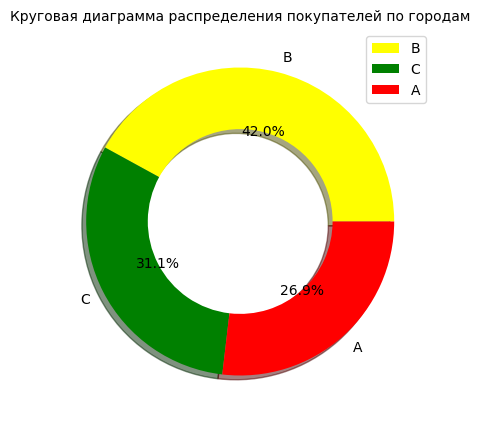

In [101]:
size = data['City_Category'].value_counts()
labels = ['B','C','A']
colors = ['yellow','green','red']

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title('Круговая диаграмма распределения покупателей по городам', fontsize = 10)
plt.legend()
plt.show()

**Задание 11** (3 балла)

Создайте массив x длиной 100 со значениями элементов от 0 до 10.

In [102]:
import numpy as np

In [103]:
# np.linespace

In [104]:
x = np.linspace(0, 10, 100)

Создайте матрицу $Y_{100\times 100}$. Каждая строка = массив (длина = длина массива x) равномерно распределенных случайных величин ~$Uniform[0,1]$

In [105]:
# np.random.uniform(low=..., high=..., size=...)

In [106]:
Y = np.zeros((100,100))
for i in range(0,100,1):
  Y[i] = np.random.uniform(low=0,high=100,size=100)

1. Постройте график средних значений по столбцам матрицы $Y$.

2. Также постройте график доверительного интервала средних значений в каждой точке y (уровень доверия $\alpha$ = 0.05). $[\bar{y} - z_{\alpha}std(y); \ \bar{y} + z_{\alpha}std(y)]$

3. Закрасьте область между графиками доверительного интервала

In [107]:
import scipy.stats

In [108]:
# scipy.stats.norm.interval, np.mean, np.std, plt.plot(..., color=...), plt.fill_between, plt.show

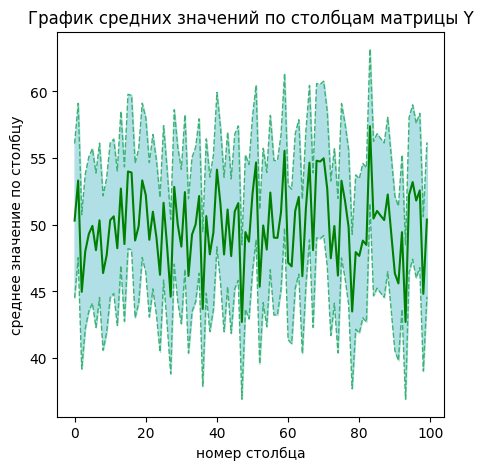

In [109]:
Z = np.zeros(100)
for i in range (0,100,1):
  Z[i] = Y.T[i].mean()

std = Z.std()
conf_int = scipy.stats.norm.interval(0.95, loc=Z, scale=std)

fig, ax = plt.subplots()

plt.plot(Z, color='g')
plt.plot(conf_int[0], color='mediumseagreen', linestyle = '--',
        linewidth = 1)
plt.plot(conf_int[1], color='mediumseagreen', linestyle = '--',
        linewidth = 1)

plt.xlabel('номер столбца')
plt.ylabel('среднее значение по столбцу')
plt.title('График средних значений по столбцам матрицы Y')
ax.fill_between(range(0,100), conf_int[0], conf_int[1],  color='powderblue')
plt.show()

**Задание 12** (3 балла)

Постройте 3 графика рядом (сгенерируйте 1000 значений и постройте гистограмму распределения):

1. Нормальное распределение $N(0,1)$

2. Равномерное распределение $U(0,1)$

3. Экспоненциальное $Exp(1)$

Гистограммы должны быть нормированы. Все оси подписаны. Все графики имеют title.

In [110]:
# np.random, plt.subplots

In [111]:
Norm = np.random.normal(loc=0.0, scale=1.0, size=1000)
Unif = np.random.uniform(low=0, high=1, size=1000)
Exp = np.random.exponential(scale=1.0, size=1000)

Text(0, 0.5, 'вероятность')

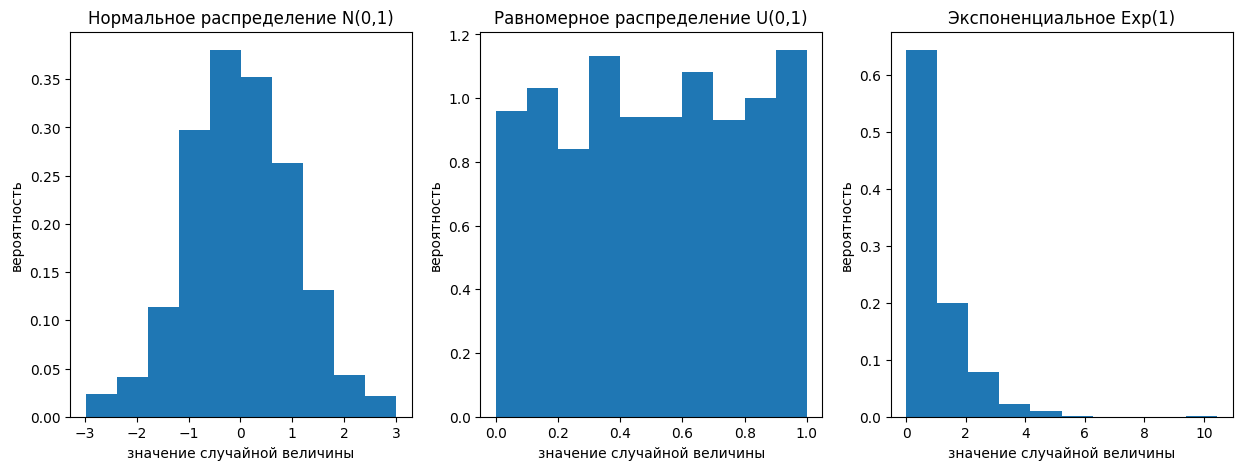

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax1.hist(Norm, density='True')
ax1.set_title('Нормальное распределение N(0,1)')
ax1.set_xlabel('значение случайной величины')
ax1.set_ylabel('вероятность')

ax2.hist(Unif, density='True')
ax2.set_title('Равномерное распределение U(0,1)')
ax2.set_xlabel('значение случайной величины')
ax2.set_ylabel('вероятность')

ax3.hist(Exp, density='True')
ax3.set_title('Экспоненциальное Exp(1)')
ax3.set_xlabel('значение случайной величины')
ax3.set_ylabel('вероятность')